In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

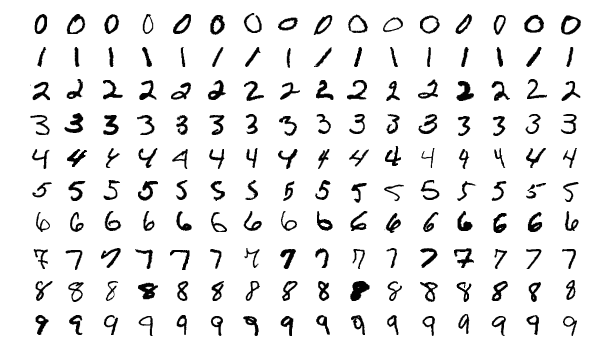

In [5]:
from IPython.display import Image
Image("../pic/MnistExamples.png") 
#https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png

MNIST 手写数字集合 database 有 55,000 训练图片 和 10,000 测试图片 5，000 validation 均是 28 * 28  pixel 
更多请参考 Yann LeCun's 网站 

In [7]:
learning_rate=0.01
batch_size=128
n_epochs=30

In [4]:
#Step1 读入数据

In [8]:
mnist = input_data.read_data_sets('../MNIST-data', one_hot=True) 

Extracting ../MNIST-data/train-images-idx3-ubyte.gz
Extracting ../MNIST-data/train-labels-idx1-ubyte.gz
Extracting ../MNIST-data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST-data/t10k-labels-idx1-ubyte.gz


In [6]:
# Step 2: 建立两个 placeholder x,y
# shape 分别为 [batch_size，784] [batch_size, 10]
# 28*28=784
# 10 个类别 （0～9）
# OHE

In [9]:
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.int32, [batch_size, 10], name='Y_placeholder')

In [8]:
# Step 3: 用 variable 来表示 w 和 b
# w 的 shape? [784, 10]  (用于和[batch_size，784] 相乘 得到[batch_size，10])
# b 的 shape? [1, 10] 

In [10]:
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights') #mean=0.0
b = tf.Variable(tf.zeros([1, 10]), name="bias")

In [10]:
# Step 4: 定义线性层

In [11]:
logits = tf.matmul(X, w) + b 

In [ ]:
# 求softmax
#y = tf.nn.softmax(tf.matmul(x, W) + b)

In [12]:
# Step 5: 定义 loss function using cross entropy sum( -y_true * log (y_pred))
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# 这里 tf.reduce_sum 沿着 1 的方向加和所有的y 然后 tf.reduce_mean 求出每一个 batch 的平均值

In [12]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

In [14]:
# Step 6: 定义训练 loss function 的方法
# 这里使用的是 GradientDescentOptimizer
# 更多 optimazer https://www.tensorflow.org/api_guides/python/train#optimizers

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [ ]:
with tf.name_scope('summaries'):   
        tf.summary.scalar ('loss',loss)
        merged_summaries = tf.summary.merge_all()

#### Start Session

In [15]:
with tf.Session() as sess:
# to visualize using TensorBoard
    writer = tf.summary.FileWriter('../logistic_reg', sess.graph)
    start_time = time.time()
    sess.run(tf.global_variables_initializer())	
    n_batches = int(mnist.train.num_examples/batch_size)
    
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
            total_loss += loss_batch
            
        print('Average loss for epoch {0}: {1}'.format(i, total_loss/n_batches))

    print('Total running time: {0} seconds'.format(time.time() - start_time))

    print('Amazing We Made it!') # should be around 0.35 after 25 epochs

# test the model
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    count_of_right_predictions = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) 
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0

    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        count_of_right_predictions_per_batch = sess.run(count_of_right_predictions, feed_dict={X: X_batch, Y:Y_batch})
        total_correct_preds += count_of_right_predictions_per_batch
        
    print('Accuracy on the testing sets is{0}'.format(total_correct_preds/mnist.test.num_examples))

    writer.close()


Average loss for epoch 0: 1.28626836693926
Average loss for epoch 1: 0.7318376915438192
Average loss for epoch 2: 0.600065612570667
Average loss for epoch 3: 0.5371594433878963
Average loss for epoch 4: 0.49777333421029135
Average loss for epoch 5: 0.4723336525035627
Average loss for epoch 6: 0.4514178379432305
Average loss for epoch 7: 0.4354616937103805
Average loss for epoch 8: 0.42370357435622136
Average loss for epoch 9: 0.41090962509592094
Average loss for epoch 10: 0.4059183022011688
Average loss for epoch 11: 0.39694211467023777
Average loss for epoch 12: 0.3911259780813764
Average loss for epoch 13: 0.38282884000898243
Average loss for epoch 14: 0.3806051816487368
Average loss for epoch 15: 0.37524502514264524
Average loss for epoch 16: 0.3694404609553464
Average loss for epoch 17: 0.36842730366961385
Average loss for epoch 18: 0.3611840589410497
Average loss for epoch 19: 0.36052964659003944
Average loss for epoch 20: 0.35486752558977175
Average loss for epoch 21: 0.354707913